**Case study :**
Risk analytics in banking and financial services,also understand how data is used to minimise the risk of losing money while lending to customers.

In [3]:
# Steps of analysis:
# 1. Data Understanding
# 2. Removal of unwanted data
# 3. Data Visualization and Analysis
# 4. Conclusion

In [4]:
#Import Libraries
import pandas as pd #dataframe
import numpy as np #numerical python
import seaborn as sns #data visualization
import matplotlib.pyplot as plt #plotting
import plotly.express as px #plotting
# Warnings library will be used to ignore some warnings
import warnings #warning
warnings.filterwarnings('ignore')

In [5]:
#Loading the data
loan_data = pd.read_csv('loan.csv')

In [6]:
# Printing the data(first 5 rows)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
#Get the Basic information about the data
## Number of rows and columns
print('Number of Columns:',loan_data.shape[1])
print('Number of Rows:',loan_data.shape[0])
## Number of missing values
print('Number of missing values:',loan_data.isnull().sum().sum())
## Number of unique values
print('Number of unique values:',loan_data.nunique().sum())
## Number of duplicates
print('Number of duplicates:',loan_data.duplicated().sum())

Number of Columns: 111
Number of Rows: 39717
Number of missing values: 2263366
Number of unique values: 416800
Number of duplicates: 0


**After manually checking the data, below are the columns identified that can help in the case study**
loan_amnt
term
int_rate
grade
sub_grade
emp_title
home_ownership
annual_inc
verification_status
loan_status
purpose
title
application_type

Below analysis has been done by applying EDA techniques, univariate and bivariate analysis.

**Cleaning the data - identify the large null value columns and rows, and remove them**

In [8]:
print(loan_data.isnull().sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [9]:
loan_data.shape

(39717, 111)

    There are a lot of columns with all null values. Those can be removed

In [10]:
loan_data.dropna(axis = 1, how = 'all', inplace = True)

loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [11]:
loan_data.shape


(39717, 57)

Manually identified coulmns which has single values.Removing them as they will not contribute in our analysis.

In [12]:
loan_data.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
loan_data.shape


(39717, 48)

Upon further analysis of the 48 columns, found that some columns are related to the post approval of loans.
Also Some other columns like member_id, id etc will not contribute to our analysis. so removing them.
id
member_id 
url
last_credit_pull_d
out_prncp_inv
total_pymnt_inv
funded_amnt
delinq_2yrs
revol_bal
out_prncp
total_pymnt
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
chargeoff_within_12_mths 
mths_since_last_delinq
mths_since_last_record

In [13]:
loan_data.drop(["id", "member_id", "url", "last_credit_pull_d", "desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)
loan_data.shape


(39717, 25)

Inorder to find the pattern of defaulters, we can avoid the data with loan status as "Current", because it is currently under repayment.So can avoid data where loan status is current.

In [14]:
loan_data = loan_data[loan_data.loan_status != "Current"]
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [15]:
(loan_data.isna().sum()/len(loan_data.index))*100

loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_title              6.185033
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
title                  0.028514
zip_code               0.000000
addr_state             0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.129611
total_acc              0.000000
dtype: float64

In [16]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  float64
 2   term                 38577 non-null  object 
 3   int_rate             38577 non-null  object 
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_title            36191 non-null  object 
 8   emp_length           37544 non-null  object 
 9   home_ownership       38577 non-null  object 
 10  annual_inc           38577 non-null  float64
 11  verification_status  38577 non-null  object 
 12  issue_d              38577 non-null  object 
 13  loan_status          38577 non-null  object 
 14  purpose              38577 non-null  object 
 15  title                38566 non-null  obje

The columns which have missing values are emp_title, title,emp_length,revol_util
title, revol_util is null for very less records hence those records can be eliminated.
For emp_title and emp_length will check for the Mode value and if required will change it accordingly.

In [17]:
print("Mode : " + loan_data.emp_length.mode()[0])
loan_data.emp_length.value_counts()

Mode : 10+ years


emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

The above shows that the difference between the highest frequency and the next value is high.
Hence assigning the mode value to the null values.


In [18]:
loan_data.emp_length.fillna(loan_data.emp_length.mode()[0], inplace = True)
loan_data.emp_length.isna().sum()

0

Checking the mode for emp_title

In [19]:
print("Mode : " + loan_data.emp_title.mode()[0])
loan_data.emp_title.value_counts()

Mode : US Army


emp_title
US Army                                     131
Bank of America                             107
IBM                                          65
AT&T                                         57
Kaiser Permanente                            56
                                           ... 
amneal pharmaceuticals                        1
Net Equity Financial                          1
Kernersville Fire Department                  1
The Keith Corp. (empl by county, now Kei      1
Evergreen Center                              1
Name: count, Length: 28027, dtype: int64

In case of emp_title, we may not be able to use mode value, hence inputting value as "Other" for null records.

In [20]:
loan_data.emp_title.fillna('Other', inplace = True)
loan_data.emp_length.isna().sum()


0

In [21]:
loan_data.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan_data.revol_util.isna().sum()

0

In [22]:
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65%,162.87,B,B2,Other,10+ years,RENT,...,Computer,860xx,AZ,27.65,Jan-85,1,3,0,83.70%,9
1,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,...,bike,309xx,GA,1.00,Apr-99,5,3,0,9.40%,4
2,2400,2400.0,36 months,15.96%,84.33,C,C5,Other,10+ years,RENT,...,real estate business,606xx,IL,8.72,Nov-01,2,2,0,98.50%,10
3,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,...,personel,917xx,CA,20.00,Feb-96,1,10,0,21%,37
5,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,...,My wedding loan I promise to pay back,852xx,AZ,11.20,Nov-04,3,9,0,28.30%,12


Standardizing the variables

In [23]:
loan_data.revol_util = pd.to_numeric(loan_data.revol_util.apply(lambda x : x.split('%')[0]))
loan_data.int_rate = pd.to_numeric(loan_data.int_rate.apply(lambda x : x.split('%')[0]))
loan_data.emp_length = pd.to_numeric(loan_data.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,B2,Other,10,RENT,...,Computer,860xx,AZ,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,0,RENT,...,bike,309xx,GA,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400.0,36 months,15.96,84.33,C,C5,Other,10,RENT,...,real estate business,606xx,IL,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,...,personel,917xx,CA,20.00,Feb-96,1,10,0,21.0,37
5,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,...,My wedding loan I promise to pay back,852xx,AZ,11.20,Nov-04,3,9,0,28.3,12


**Outliers**

<Axes: >

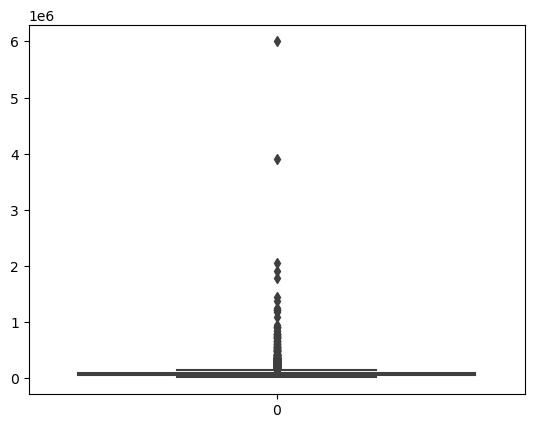

In [24]:
sns.boxplot(loan_data['annual_inc'])

In [25]:
quantile_info = loan_data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info


0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [26]:
per_95_annual_inc = loan_data['annual_inc'].quantile(0.95)
loan_data = loan_data[loan_data.annual_inc <= per_95_annual_inc]

<Axes: >

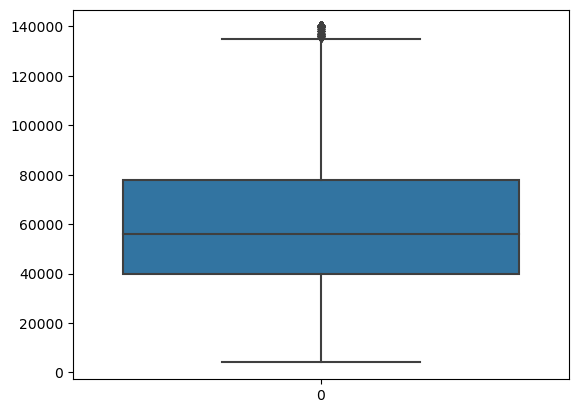

In [27]:
sns.boxplot(loan_data.annual_inc)

Categorical Data -
Grade and sub grade

In [28]:
loan_data.sub_grade = pd.to_numeric(loan_data.sub_grade.apply(lambda x : x[-1]))
loan_data.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

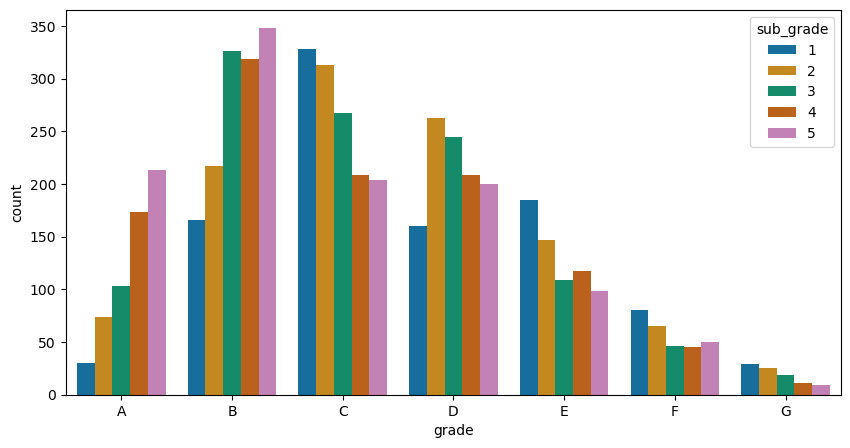

In [29]:
fig, ax = plt.subplots(figsize=(10,5))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='grade', ylabel='count'>

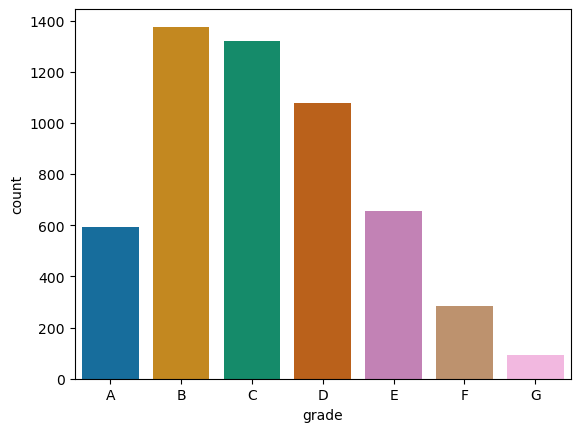

In [30]:
sns.countplot(x = 'grade', data = loan_data[loan_data.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

Analyzing Area - Probably this is not a good data to analyze in this scenario.

In [31]:
loan_data['addr_state'].unique()

array(['AZ', 'GA', 'IL', 'CA', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT', 'FL',
       'NY', 'PA', 'MN', 'NJ', 'OR', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'NV', 'AK', 'CO', 'MD', 'WV', 'VT', 'MI', 'DC',
       'SD', 'NH', 'AR', 'NM', 'KS', 'HI', 'OK', 'MT', 'WY', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME'], dtype=object)

<Axes: xlabel='addr_state', ylabel='count'>

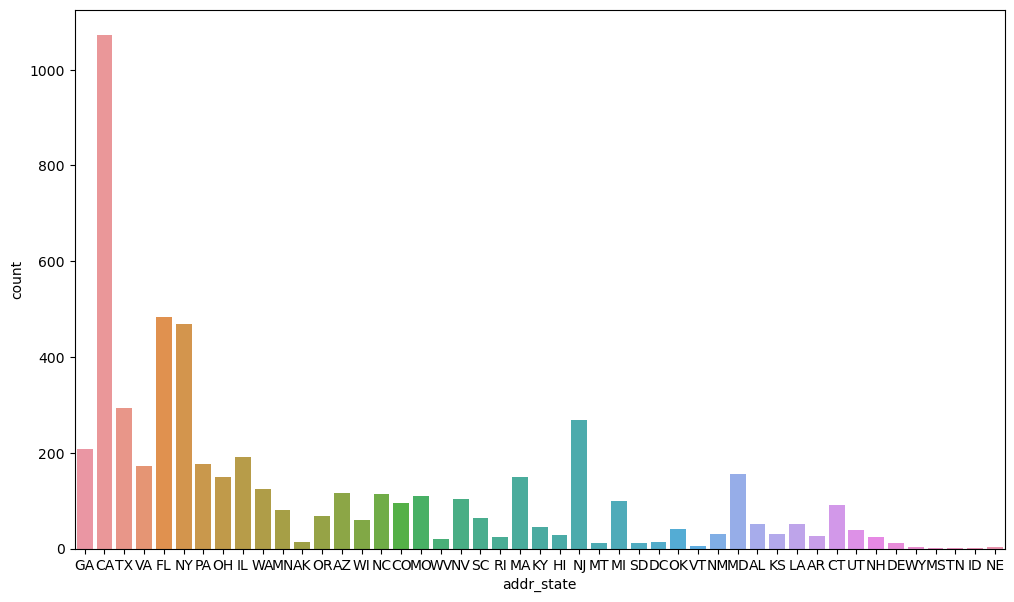

In [32]:
fig, ax = plt.subplots(figsize = (12,7))
# ax.set(yscale = 'log')
sns.countplot(x='addr_state', data=loan_data[loan_data['loan_status']=='Charged Off'])

home_ownership 

In [33]:
loan_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [34]:
#replacing 'NONE' with 'OTHERS' as there are only 3 records with value NONE 
loan_data['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

<Axes: xlabel='home_ownership', ylabel='count'>

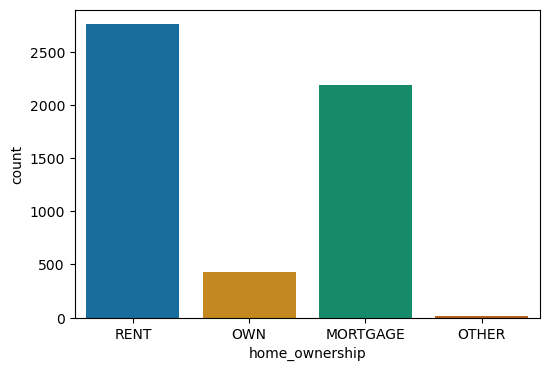

In [35]:
fig, ax = plt.subplots(figsize = (6,4))

sns.countplot(x='home_ownership', data=loan_data[loan_data['loan_status']=='Charged Off'])

purpose

<Axes: xlabel='count', ylabel='purpose'>

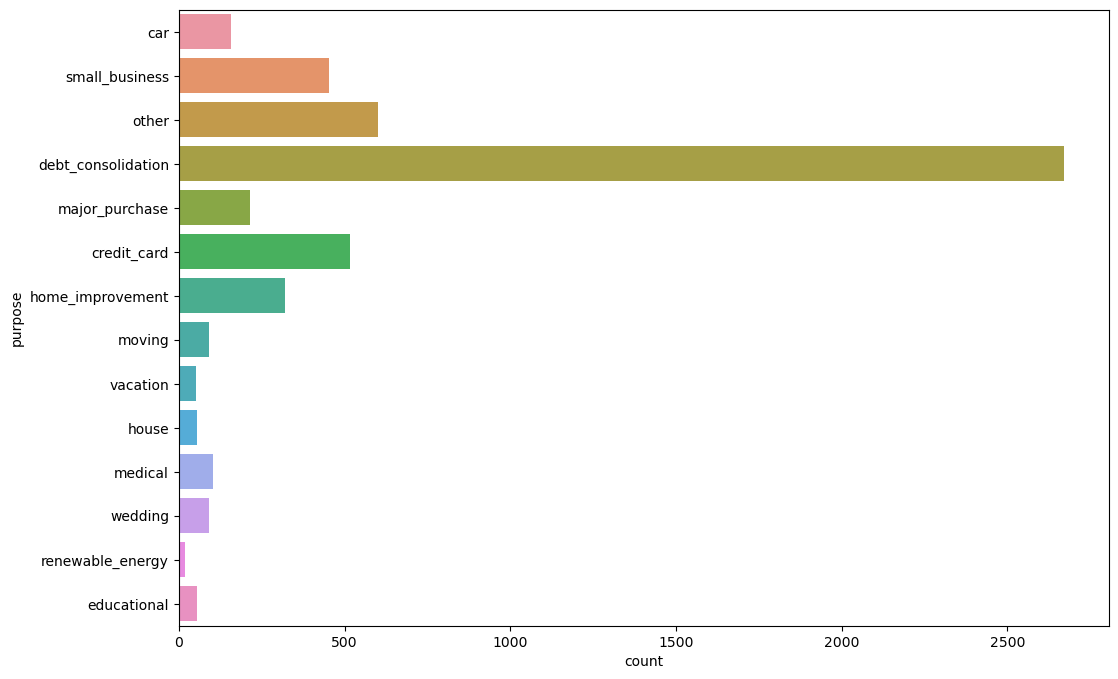

In [36]:
fig, ax = plt.subplots(figsize = (12,8))

sns.countplot(y ='purpose', data=loan_data[loan_data.loan_status == 'Charged Off'])

Need to categorise some data like int_rate,open_acc,revol_util,total_acc,annual_inc. Creating bins for the same

In [37]:
loan_data['int_rate_groups'] = pd.cut(loan_data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_data['open_acc_groups'] = pd.cut(loan_data['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan_data['revol_util_groups'] = pd.cut(loan_data['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan_data['total_acc_groups'] = pd.cut(loan_data['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan_data['annual_inc_groups'] = pd.cut(loan_data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [38]:
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups
0,5000,4975.0,36 months,10.65,162.87,B,2,Other,10,RENT,...,1,3,0,83.7,9,9%-13%,2-10,80-100,2-20,3k-31k
1,2500,2500.0,60 months,15.27,59.83,C,4,Ryder,0,RENT,...,5,3,0,9.4,4,13%-17%,2-10,0-20,2-20,3k-31k
2,2400,2400.0,36 months,15.96,84.33,C,5,Other,10,RENT,...,2,2,0,98.5,10,13%-17%,2-10,80-100,2-20,3k-31k
3,10000,10000.0,36 months,13.49,339.31,C,1,AIR RESOURCES BOARD,10,RENT,...,1,10,0,21.0,37,13%-17%,2-10,20-40,20-37,31k-58k
5,5000,5000.0,36 months,7.90,156.46,A,4,Veolia Transportaton,3,RENT,...,3,9,0,28.3,12,5%-9%,2-10,20-40,2-20,31k-58k


Analysing the above created categorical data

<Axes: xlabel='int_rate_groups', ylabel='count'>

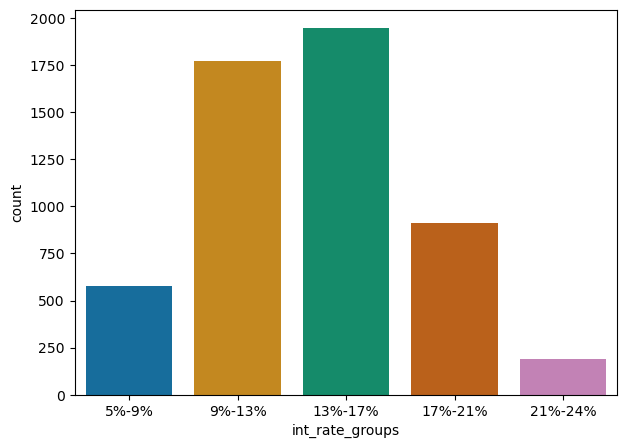

In [39]:
fig, ax = plt.subplots(figsize = (7,5))
sns.countplot(x='int_rate_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])


<Axes: xlabel='emp_length', ylabel='count'>

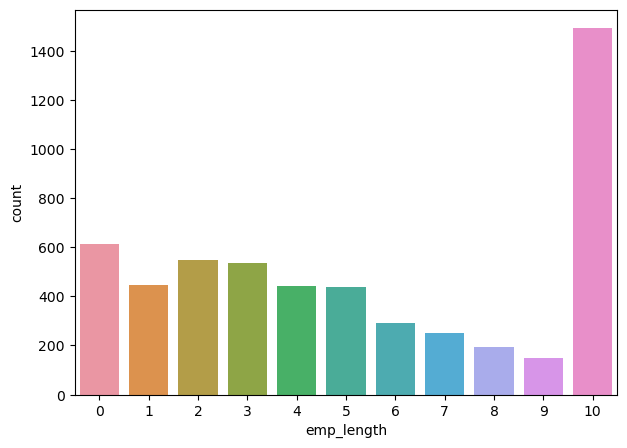

In [40]:
fig, ax = plt.subplots(figsize = (7,5))
sns.countplot(x='emp_length', data=loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='int_rate_groups', ylabel='count'>

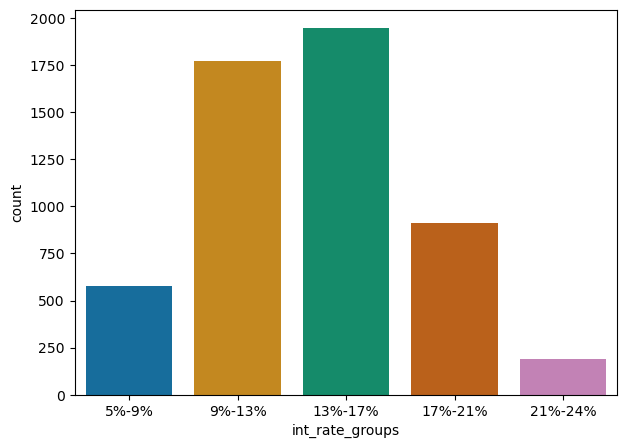

In [41]:
fig, ax = plt.subplots(figsize = (7,5))
sns.countplot(x='int_rate_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='open_acc_groups', ylabel='count'>

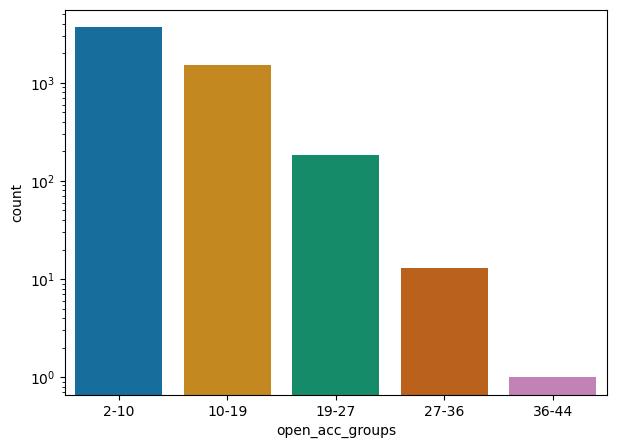

In [42]:
fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='open_acc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='revol_util_groups', ylabel='count'>

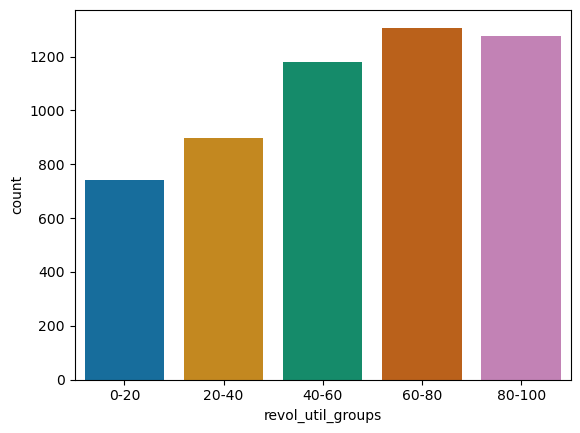

In [43]:
sns.countplot(x='revol_util_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='total_acc_groups', ylabel='count'>

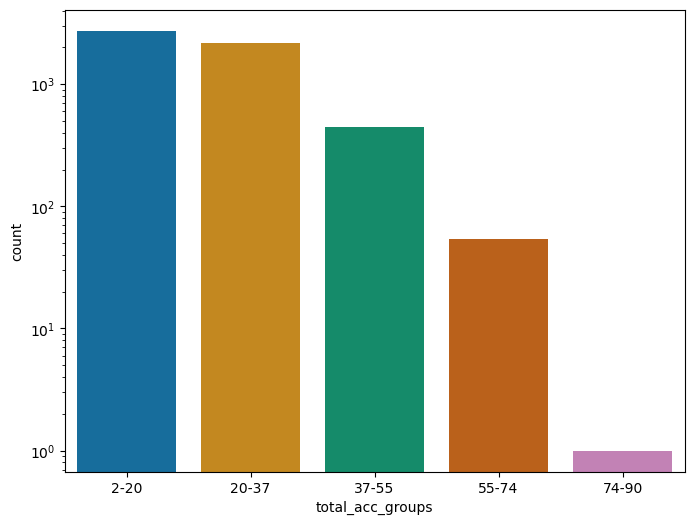

In [44]:
fig, ax = plt.subplots(figsize = (8,6))
ax.set_yscale('log')
sns.countplot(x='total_acc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='annual_inc_groups', ylabel='count'>

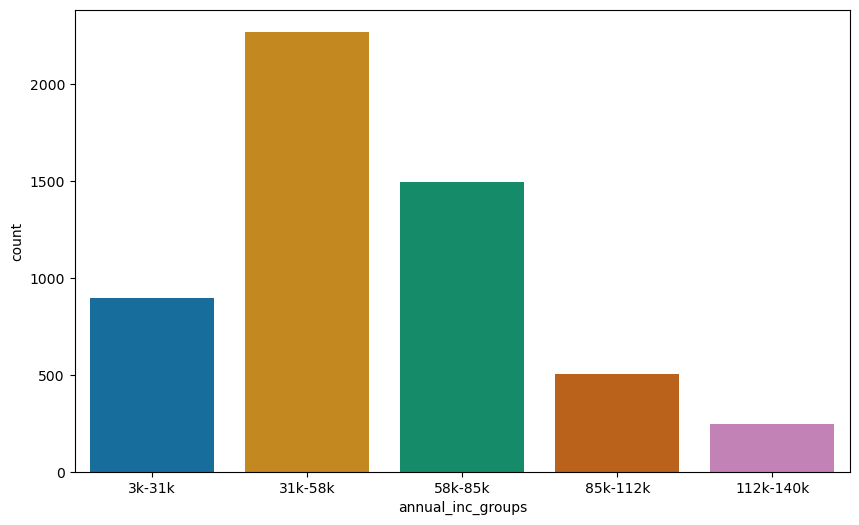

In [45]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='annual_inc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

Loan issued month and year against charged off loans

In [46]:
## Extracting month and year
df_month_year = loan_data['issue_d'].str.partition("-", True)     
loan_data['issue_month']=df_month_year[0]                       
loan_data['issue_year']='20' + df_month_year[2]

<Axes: xlabel='issue_year', ylabel='count'>

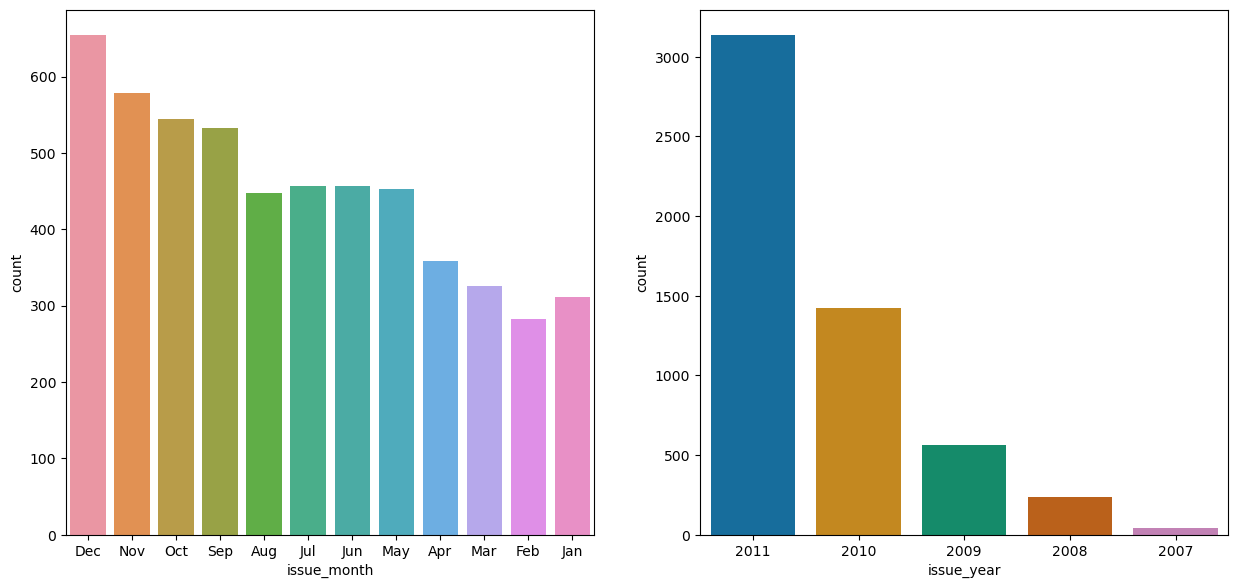

In [47]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=loan_data[loan_data['loan_status']=='Charged Off'])

As per the above plots the maximum number of defaulters occured , for the loans sanctioned in the year 2011,Dec.

Analyzing loan_amnt

In [48]:
loan_data['loan_amnt_groups'] = pd.cut(loan_data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])

<Axes: xlabel='loan_amnt_groups', ylabel='count'>

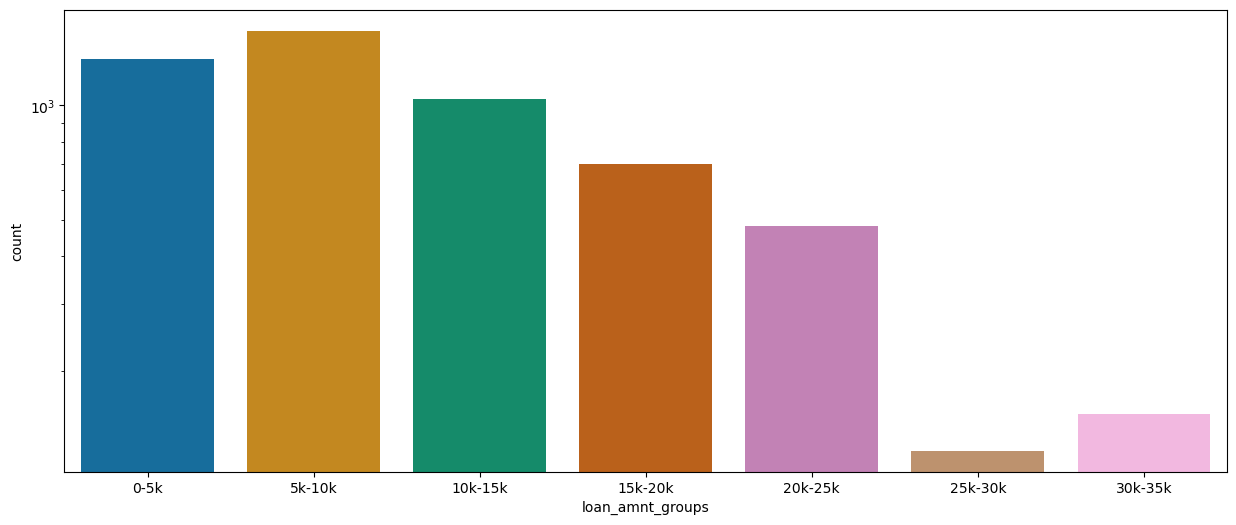

In [49]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

**Observations from the above analysis**
The applicants which fall under below category , have more chances to be considered as defaulters.
    -  Applicants having house_ownership as 'RENT'
    -  Applicants who use the loan to clear other debts
    -  Applicants who receive interest at the rate of 13-17%
    -  Applicants who have an income of range 31201 - 58402
    -  Applicants who have 20-37 open_acc
    -  Applicants with employment length of 10
    -  Loan amount is between 5429 - 10357
    -  When the purpose is 'debt_consolidation'
    -  Grade is 'B'
    
The high number of loan defaults for the loans issue in the year/month 2011/Dec.


Analysing annual income with other columns for more observations

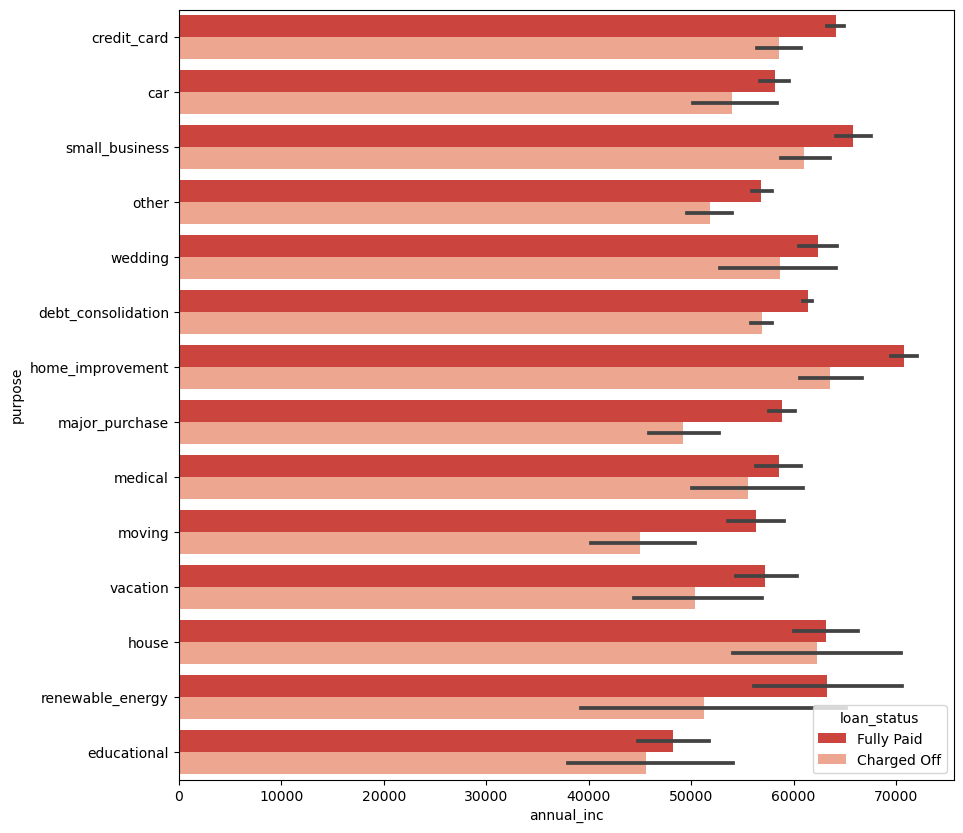

In [50]:
#Annual income vs loan purpose
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='annual_inc', y='purpose', hue ='loan_status',palette="Reds_r")
plt.show()

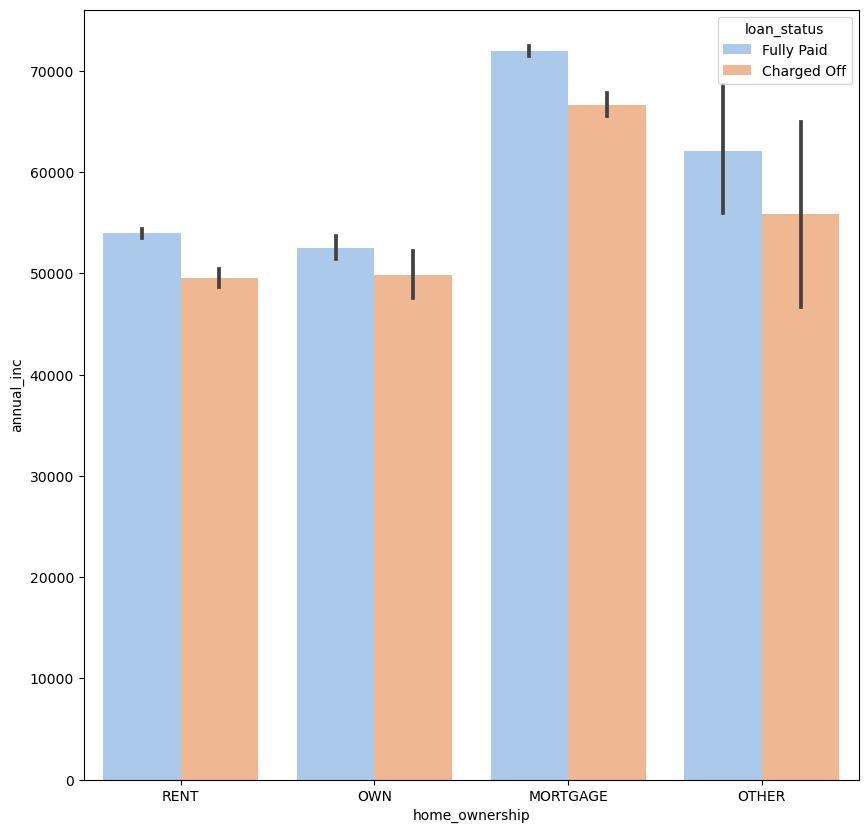

In [51]:
#Annual income vs home ownership
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

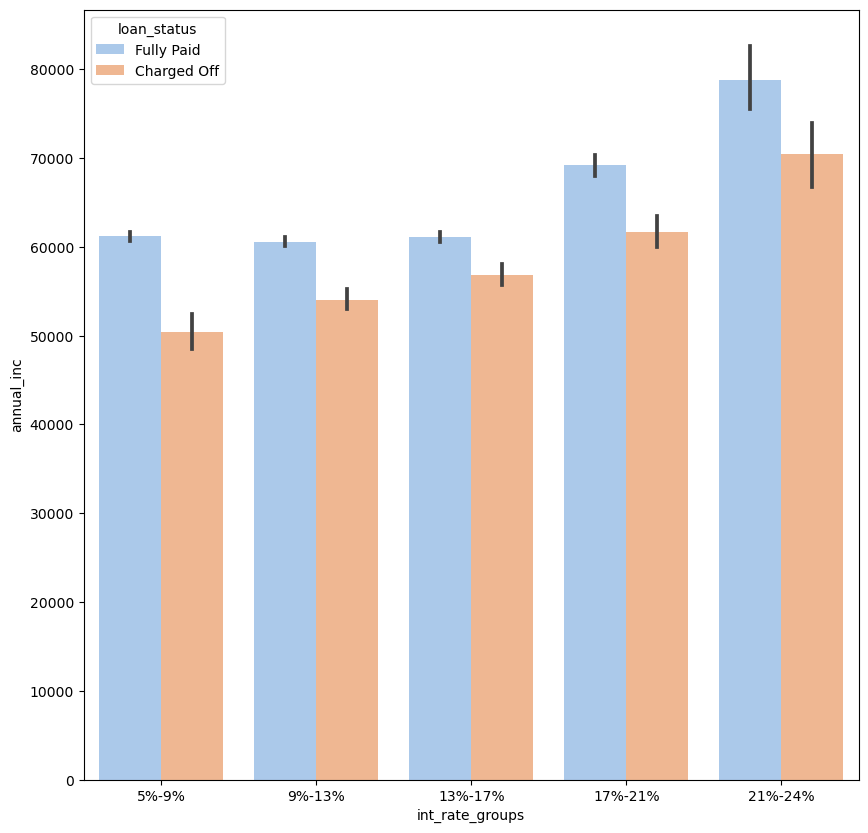

In [52]:
#Annual income vs int_rate
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

Based on the above analysis on annual income , the applicants with below characteristics tend to be defaulters
    -  Applicants taking loan for 'home improvement' and have income of 60k -70k
    -  Applicants whose home ownership is 'MORTGAGE and have income of 60-70k
    -  Applicants who receive interest at the rate of 21-24% and have an income of 70k-80k

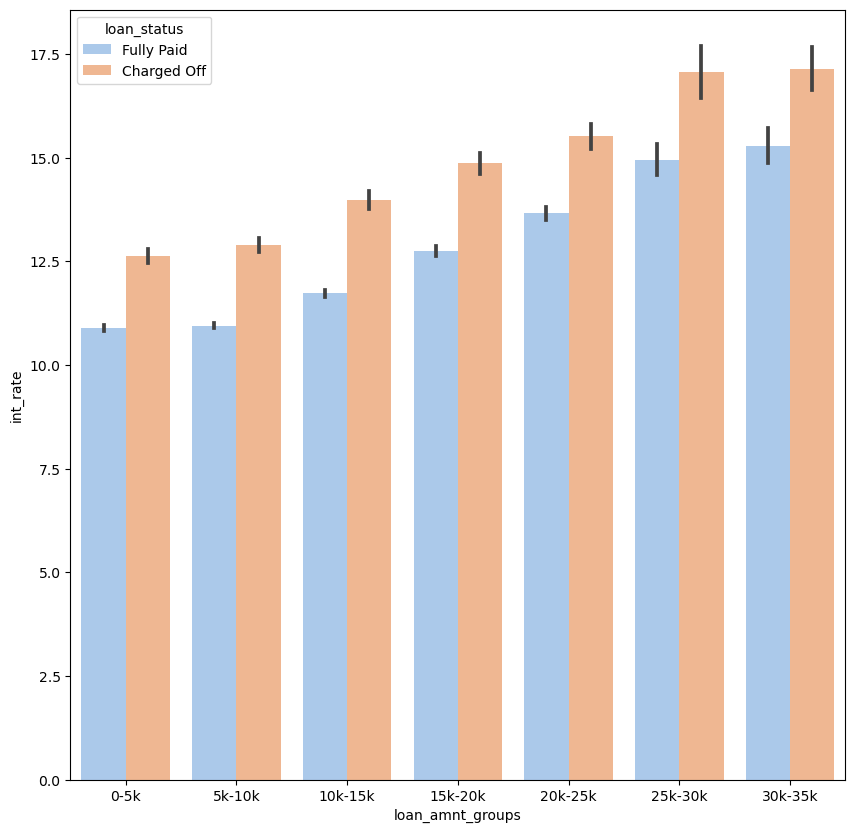

In [53]:
#Loan Amount vs Interest Rate
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="pastel")
plt.show()

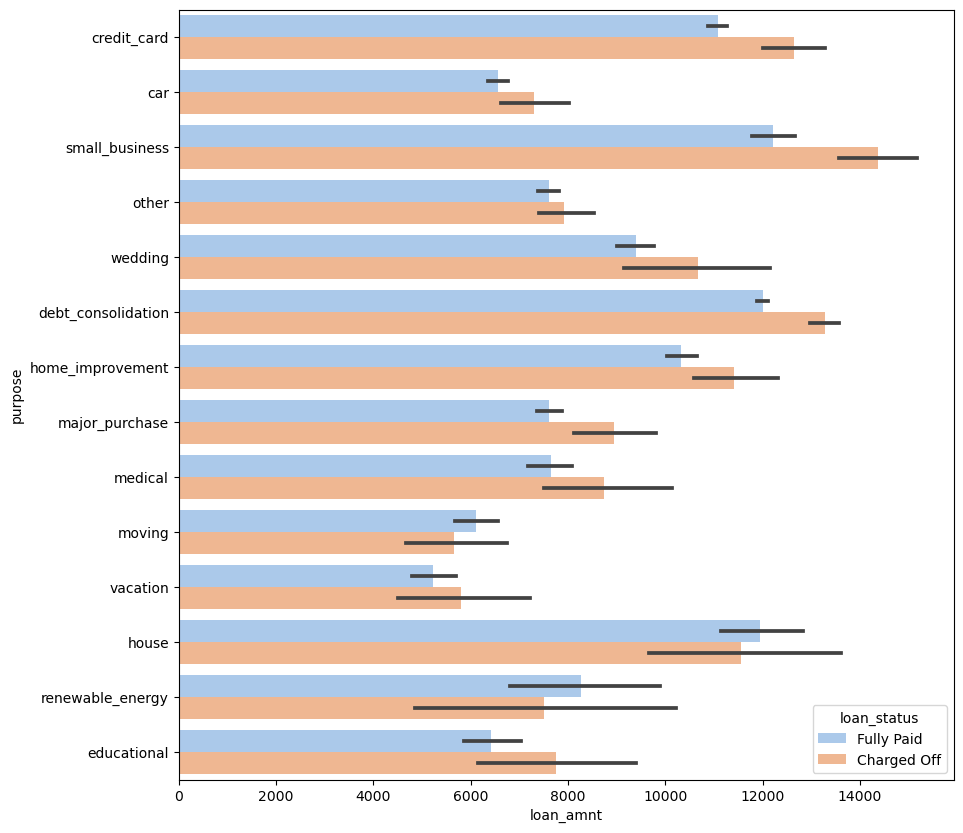

In [54]:
#Loan vs Loan purpose
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

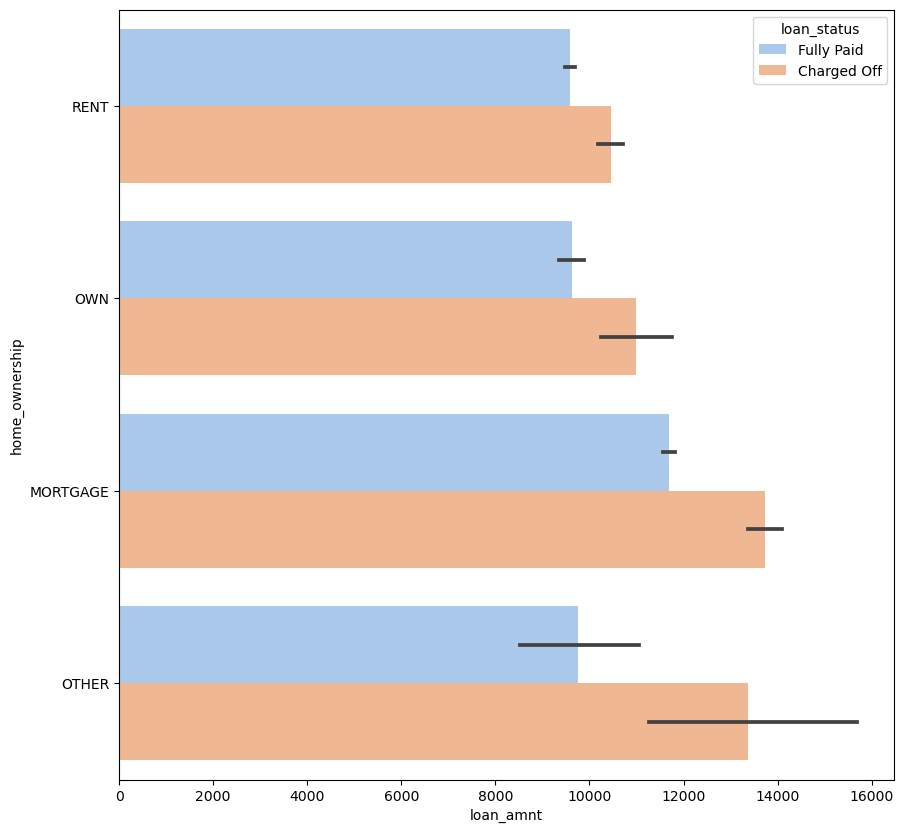

In [55]:
#Loan vs House Ownership
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="pastel")
plt.show()

Also Based on loan amount vs other fields comparison below are the observations for probable defaulters
    -  Applicants who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17.5 %
    -  Applicants who have taken a loan for small business and the loan amount is greater than 14k
    -  Applicants whose home ownership is 'MORTGAGE and have loan of 14-16k